In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import scipy.stats as stats

## Задание 1

In [ ]:
# накопленная оценка
cum_estimate = lambda x: (np.cumsum(x) / np.arange(1, len(x) + 1)) / (np.cumsum(x) / np.arange(1, len(x) + 1) - 1)

In [ ]:
n = int(1e5)
np.random.seed(89) 
pareto_sample_1 = stats.pareto.rvs(b = 1, size=n) # значение параметра k = 1
np.random.seed(89) 
pareto_sample_2 = stats.pareto.rvs(b = 2, size=n) # k = 2

In [ ]:
pareto_estimate_1 = cum_estimate(pareto_sample_1)
pareto_estimate_2 = cum_estimate(pareto_sample_2)

## Накопленная оценка при k = 1

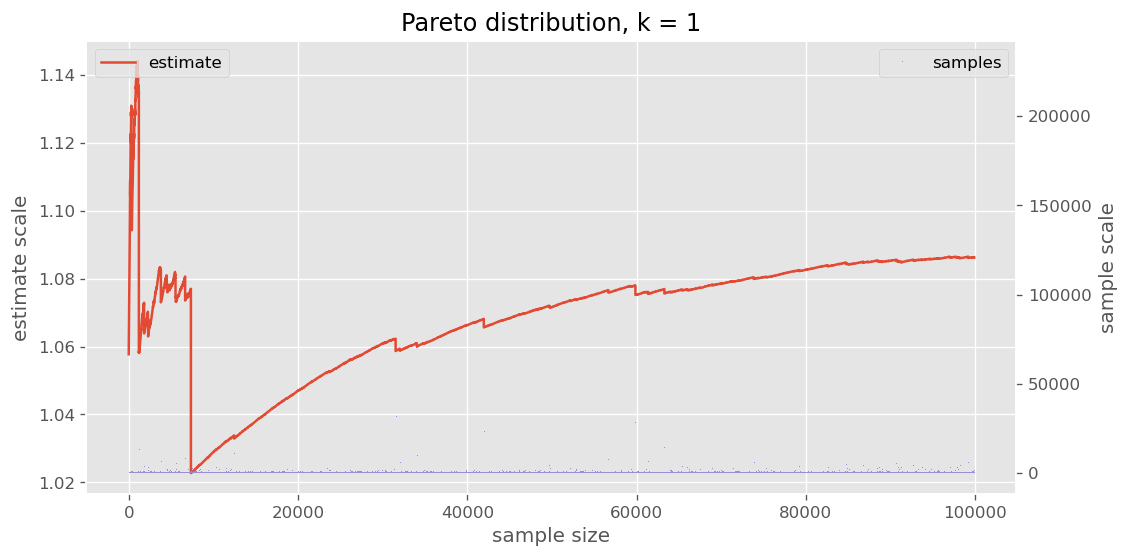

In [ ]:
fig, ax = plt.subplots(dpi=120, figsize=[10, 5])
ax_twin = ax.twinx()
ax_twin.grid(False)

ax.plot(pareto_estimate_1[100:], color='C0', label="estimate")
ax_twin.plot(pareto_sample_1[100:], ',', color='C2', label="samples")

ax.legend(loc="upper left")
ax_twin.legend(loc="upper right")

ax.set(xlabel="sample size", title="Pareto distribution, k = 1", ylabel="estimate scale")
ax_twin.set(ylabel="sample scale");

Видим, что при увеличении выборки накопленная оценка не сходится к истинному значению параметра k = 1.

Это можно можно объяснить тем, что при k = 1 матожидания не существует:


$$\int_1^{\infty} x{\cdot}p(x)dx = \int_1^{\infty}\frac{1}{x}dx$$


Данный интеграл расходится, значит мы не можем воспользоваться методом моментов.

## Накопленная оценка при k = 2

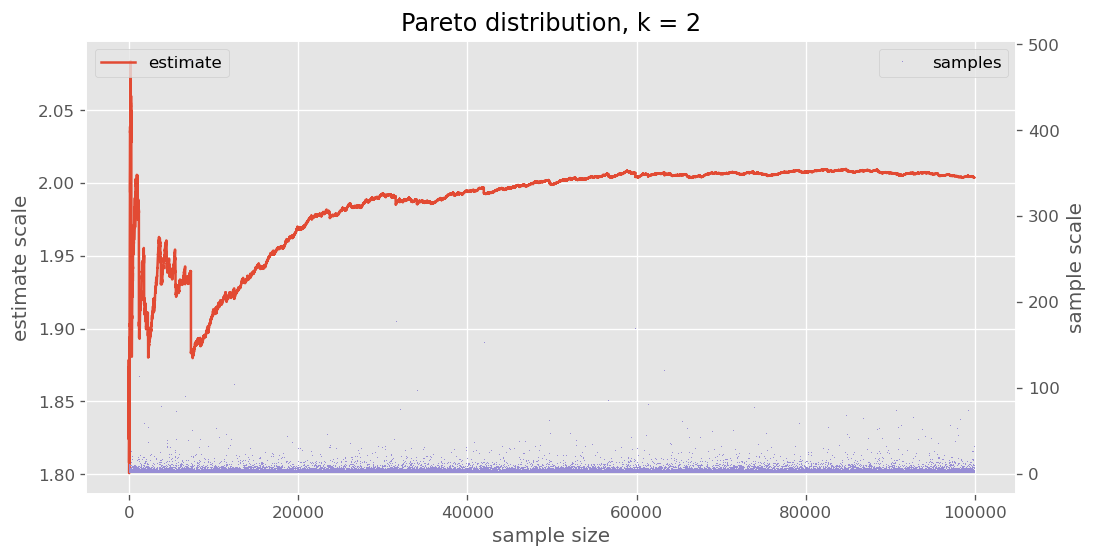

In [ ]:
fig, ax = plt.subplots(dpi=120, figsize=[10, 5])
ax_twin = ax.twinx()
ax_twin.grid(False)

ax.plot(pareto_estimate_2[100:], color='C0', label="estimate")
ax_twin.plot(pareto_sample_2[100:], ',', color='C2', label="samples")

ax.legend(loc="upper left")
ax_twin.legend(loc="upper right")

ax.set(xlabel="sample size", title="Pareto distribution, k = 2", ylabel="estimate scale")
ax_twin.set(ylabel="sample scale");

В данном случае видно, что накопленная оценка сходится к истинному значению параметра k = 2 при $n \to \infty$.

Действительно, при k = 2 матожидание существует:

$$\mathbb E [X] = \frac{2}{2-1}\ = 2$$

Можно искать оценку методом моментов.

## Задание 2

In [ ]:
sample = np.array([0.164, 0.395, 0.113, 0.401, 0.287, 1.757])

In [ ]:
def l_likelihood(l, sample=sample):
    """
    This function calculates log-likelihood for a sample.

    l : float > 0
    sample : np.array
    """

    n = len(sample)
    x = np.sum(sample)

    return n*np.log(l)-l*x

Рассчитаем функцию правдоподобия на отрезке $[0, 7]$

In [ ]:
l = np.linspace(0, 7, 100)[1:] # выкидываем 0

result = l_likelihood(l) # считаем функцию правдоподобия

Построим график функции прадоподобия на отрезке $[0, 7]$

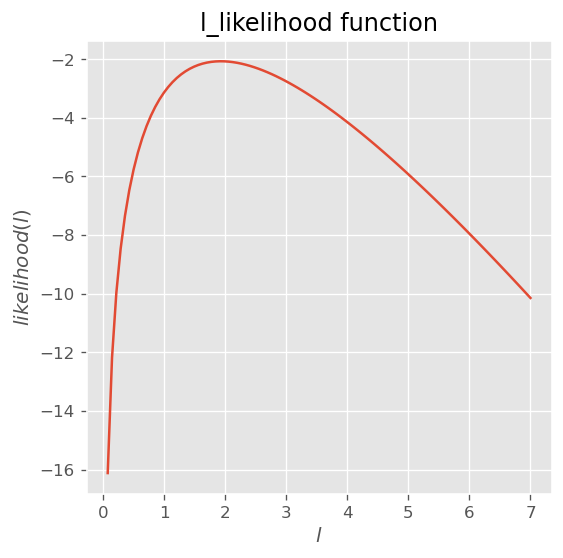

In [ ]:
fig, ax = plt.subplots(figsize=[5, 5], dpi=120)

ax.plot(l, result)

ymin, ymax = ax.get_ylim()

ax.set(xlabel=r"$l$", ylabel=r"$likelihood(l)$", title="l_likelihood function");

Численно оптимизируем функцию правдоподобия:

In [ ]:
f = lambda l: - l_likelihood(l)

from scipy.optimize import minimize
eps = 1e-6

estimate = minimize(
    fun=f,                       
    x0=3.5,                      
    bounds=[(0 + eps, 7)]   
)

print(f"Оптимизированное значение параметра функции правдоподобия: {estimate.x[0]:.8f}")

Оптимизированное значение параметра функции правдоподобия: 1.92492780


Аналитически найдём значение аргумента, при котором функция правдоподобия достигает максимума.

Производная от прологарифмированной функции правдоподобия:

$$
l'(\lambda) = \frac{n}{\lambda} - \sum\limits_{i=1}^{n} x_i
$$

Приравняем производную к нулю и выразим $\lambda$:

$$
\lambda = \frac{n}{\sum\limits_{i=1}^{n} x_i}
$$

Найдём $\lambda$ для нашей выборки:

In [ ]:
print(f"Аналитически найденное значение параметра функции правдоподобия: {len(sample)/np.sum(sample):.8f}")

Аналитически найденное значение параметра функции правдоподобия: 1.92492782


Сравнивая аналитическое решение со значением параметра, полученного с помощью `scipy.optimize.minimize`, можно сказать, что они приблизительно равны, первое отличие в 8 знаке после запятой.